In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


combined_wine = pd.read_csv('combined_wine.csv')
combined_wine.head()
combined_wine.shape

(6497, 13)

In [3]:
# make a copy of the data

combined_wine_copy = combined_wine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
combined_wine_copy['quality_label'] = combined_wine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

combined_wine_copy.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


Droping the columns

In [4]:
# drop the 'quality' column
combined_wine_copy = combined_wine_copy.drop(columns = 'quality')

Encoding

In [5]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_wine_copy['quality_label'] = le.fit_transform(combined_wine_copy['quality_label'])
combined_wine_copy['type'] = le.fit_transform(combined_wine_copy['type']) 
combined_wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2


Split the Data

In [6]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

X = combined_wine_copy.drop('quality_label', axis=1) #features
y = combined_wine_copy['quality_label'] #target

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("original:",combined_wine_copy.shape, "\nX:", X.shape, "\ny:", y.shape)

original: (6497, 13) 
X: (6497, 12) 
y: (6497,)


In [7]:
y_test.value_counts()
y_test.shape
y_train.value_counts()
y_train.shape


(5197,)

In [8]:
# # normalize data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Building model - RandomForestClassifier

0.8576923076923076


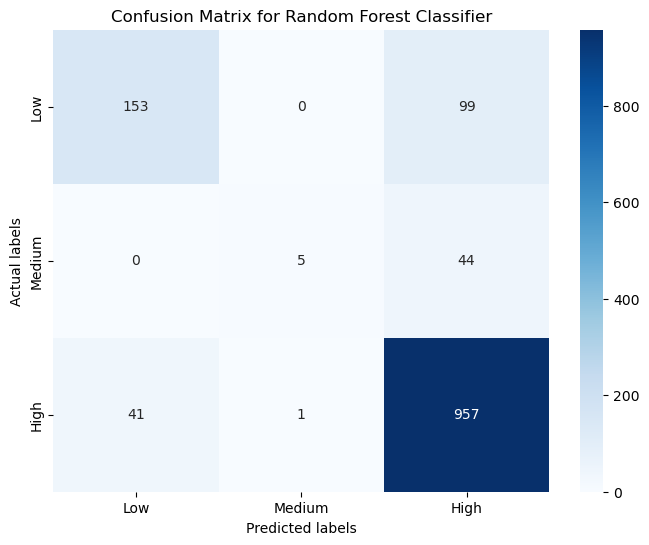

In [16]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier


#initializing the model
RF_model = randomforestclassifier(random_state=42)

#fitting the model
RF_model.fit(X_train, y_train)

# Prediction
preds = RF_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

classification_report(y_test, preds) #classification report
#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],  # Changed from ['Red', 'White']
            yticklabels=['Low', 'Medium', 'High'])  # Changed from ['Red', 'White']
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Building model - RandomForestClassifier - Model Improvement - RandomizedSearchCV

In [14]:
import numpy as np

param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

In [20]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier
from sklearn.model_selection import RandomizedSearchCV

#initializing the model
RF_model = randomforestclassifier(random_state=42)

#initializing the RandomizedSearchCV
RS_grid = RandomizedSearchCV(
    estimator=RF_model,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    return_train_score=True
)

#fitting the model
RS_grid.fit(X_train, y_train)

preds = RS_grid.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

0.8269230769230769


In [21]:
grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_score"], columns=["Accuracy"])
], axis=1)

grid_results

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,class_weight,bootstrap,Accuracy
0,300,5,2,log2,NaN,balanced,True,0.552620
1,250,10,2,sqrt,NaN,balanced,True,0.572351
2,250,5,4,sqrt,20.0,balanced,True,0.589500
3,250,5,4,log2,20.0,balanced,True,0.589500
4,250,5,2,sqrt,20.0,balanced,True,0.553282
5,250,5,4,sqrt,15.0,balanced,True,0.595251
6,350,10,2,sqrt,NaN,balanced,True,0.571418
7,300,5,4,log2,20.0,balanced,True,0.589500
8,350,10,4,log2,NaN,balanced,True,0.593130
9,350,10,2,log2,NaN,balanced,True,0.571418


In [17]:
print(RS_grid.best_params_)

{'n_estimators': 350, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}
